<a href="https://colab.research.google.com/github/gogosean/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

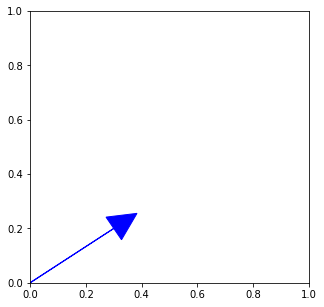

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

#adjusted for scale
blue = [.3, .2]


plt.figure(figsize=(5,5))
plt.arrow(0,0, blue[0], blue[1],head_width=.1, head_length=0.1, color ='blue')

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
#it is the length of a vector

b=[17,-4,-2,1]

from numpy import linalg as LA

LA.norm(b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
import numpy as np

c = np.asarray([3,7,-2,12])
d = np.asarray([9,-7,4,6])

print(np.dot(c,d))

#the dot product is not zero, therefore they are not orthogonal

42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
e=[[7,4,2],[1,3,-1],[2,6,-4]]
e=np.asarray(e)
print(np.linalg.inv(e) )
print(e.transpose() )


[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

print("Mean:","Customers:",  df.customers.mean()    )
print("Mean:","Snow:", df.snow.mean()     )
print("Variance:","Customers:", df.customers.var()    )
print("Variance:","Snow:", df.snow.var()    )
print("Standard Deviation:","Customers:", df.customers.std(ddof=1)    )
print("Standard Deviation::","Snow:", df.snow.std(ddof=1)     )

#std(ddof=0)

Mean: Customers: 1135.7142857142858
Mean: Snow: 2.7142857142857144
Variance: Customers: 98761.90476190478
Variance: Snow: 8.571428571428571
Standard Deviation: Customers: 314.26406851866597
Standard Deviation:: Snow: 2.9277002188455996


In [0]:
##### Your Code Here #####

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#No they are not on the same scale

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
np.cov(df.customers,df.snow)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

##2.4 What are Eigenvalues and Eigenvectors?

An eigenvector is any vector that doesn't change its orientation during a given transformation. An eigenvalue will tell you how much it wobbles around it's true self when studied.

...

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

data2 = { 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data2)


from sklearn.preprocessing import StandardScaler

x= StandardScaler().fit_transform(df)


# Look at the data
x

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [0]:
##### Your Code Here #####
#see above

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
principalComponents

array([[-0.95448984,  0.32831832],
       [-4.52095094, -1.73537967],
       [ 0.48797835,  3.23367195],
       [ 4.98746242, -1.8266106 ]])

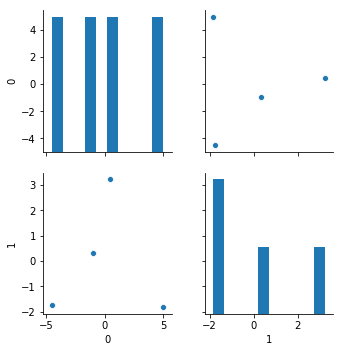

In [0]:
import seaborn as sns

y = pd.DataFrame(principalComponents)
sns.pairplot(y)

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't clustering.

Prioritize calculating the clusters over graphing them, but graph them as well if you have time.

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.preprocessing import StandardScaler

#print(points.shape)

x= StandardScaler().fit_transform(points)

print(x)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
##### Your Code Here #####
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalDf)
labels = kmeans.labels_

In [0]:
new_column_series = pd.Series(labels)
points['cluster'] = new_column_series
points.head(5)

,x,y,cluster
0,-7.846803,-3.421277,1
1,-3.554323,-6.884729,2
2,-0.192822,-9.671030,2
3,-6.401456,-5.223972,2
4,-0.804026,-9.704457,2


In [0]:
new_column_series1 = pd.Series(principalDf['principal component 1'])
new_column_series2 = pd.Series(principalDf['principal component 2'])

In [0]:
points['pca1'] = new_column_series1
points['pca2'] = new_column_series2

points.head(5)

,x,y,cluster,pca1,pca2
0,-7.846803,-3.421277,1,-0.859119,-0.859524
1,-3.554323,-6.884729,2,-0.631241,0.248206
2,-0.192822,-9.671030,2,-0.462188,1.125087
3,-6.401456,-5.223972,2,-0.863236,-0.405686
4,-0.804026,-9.704457,2,-0.561522,1.034245


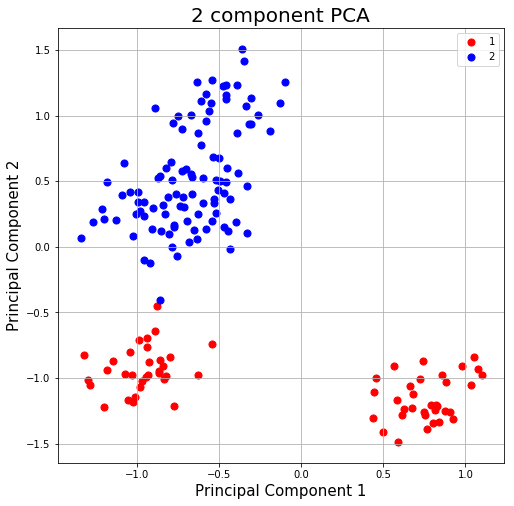

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [ 1, 2]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = points['cluster'] == target
    ax.scatter(points.loc[indicesToKeep, 'pca1']
               , points.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()